# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import urllib.parse
from scipy.stats import linregress
from dotenv import load_dotenv
import os

# Impor the OpenWeatherMap API key
load_dotenv()
api_key_weather = os.getenv("api_key_weather")

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


In [4]:
"""
    From docs: https://openweathermap.org/current
    https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
"""

'\n    From docs: https://openweathermap.org/current\n    https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}\n'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code

In [16]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []
units = 'metric'

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    query_params = {
        'q': city,
        'appid': api_key_weather,
        'units': units
    }

    query_string = urllib.parse.urlencode(query_params)
    city_url = f"{url}?{query_string}"
    print(city_url)
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # city_date = city_weather

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,})
                          # "Date": city_date})

        print(city_weather)
    except:
        print(f"couldnt find {city}")
    finally:
        print("pausing for 1 second")
        time.sleep(1)
        
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?q=puerto+ayora&appid=a6d33a53a92cdb76f3d1eb83ac0c2b2b&units=metric
Processing Record 1 of Set 1 | puerto ayora
{'coord': {'lon': -90.3518, 'lat': -0.7393}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.47, 'feels_like': 26.47, 'temp_min': 26.47, 'temp_max': 26.47, 'pressure': 1011, 'humidity': 81, 'sea_level': 1011, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 2.94, 'deg': 15, 'gust': 3.7}, 'clouds': {'all': 100}, 'dt': 1741265371, 'sys': {'country': 'EC', 'sunrise': 1741262947, 'sunset': 1741306582}, 'timezone': -21600, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
pausing for 1 second
https://api.openweathermap.org/data/2.5/weather?q=pemangkat&appid=a6d33a53a92cdb76f3d1eb83ac0c2b2b&units=metric
Processing Record 2 of Set 1 | pemangkat
{'coord': {'lon': 108.9667, 'lat': 1.1

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,26.47,81,100,2.94,EC
1,pemangkat,1.1667,108.9667,26.94,83,100,1.78,ID
2,invercargill,-46.4000,168.3500,11.73,93,100,2.70,NZ
3,emerald,-23.5333,148.1667,29.53,40,100,2.80,AU
4,forster,-32.1667,152.5167,22.34,84,98,8.14,AU


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,26.47,81,100,2.94,EC
1,pemangkat,1.1667,108.9667,26.94,83,100,1.78,ID
2,invercargill,-46.4000,168.3500,11.73,93,100,2.70,NZ
3,emerald,-23.5333,148.1667,29.53,40,100,2.80,AU
4,forster,-32.1667,152.5167,22.34,84,98,8.14,AU


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

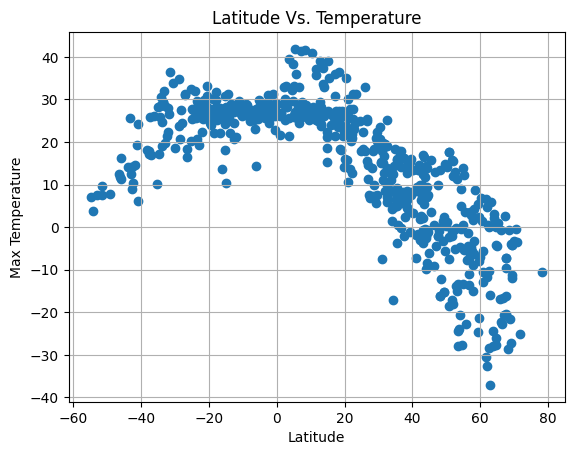

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude Vs. Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

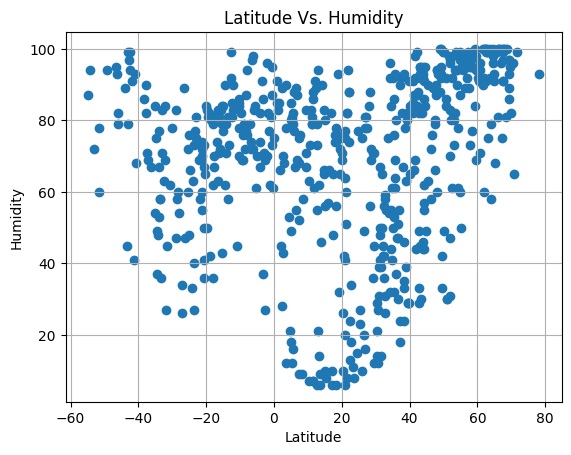

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs. Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

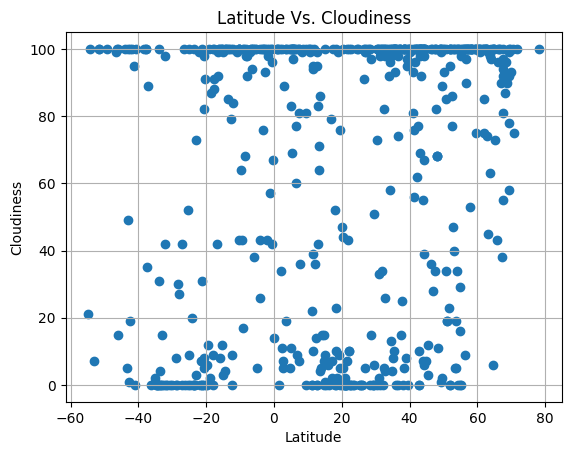

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs. Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

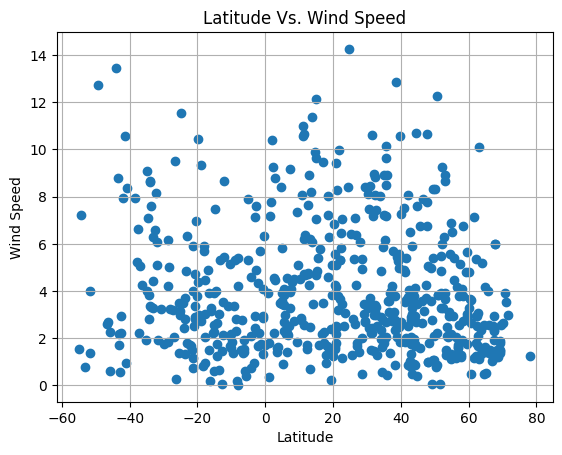

In [40]:
# Build the scatter plots for latitude vs. windspeed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs. Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, filepath):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.figure(figsize=(8, 6))
    
    plt.scatter(x_values, y_values, edgecolors='black', alpha=0.7)
    plt.plot(x_values, regress_values, "r-")
    
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
    
    plt.text(0.05, 0.95, f"R²-value is: {r_value**2:.16f}", fontsize=10, color="black", 
             ha='left', va='top', transform=plt.gcf().transFigure)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(filepath, bbox_inches='tight')

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
1,pemangkat,1.1667,108.9667,26.94,83,100,1.78,ID
8,eforie sud,44.0229,28.6494,14.47,44,55,0.92,RO
10,whitehorse,60.7161,-135.0538,-5.55,96,99,3.61,CA
11,bethel,41.3712,-73.4140,9.47,87,76,3.54,US
12,isafjordur,66.0755,-23.1240,-0.75,81,100,2.56,IS


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,26.47,81,100,2.94,EC
2,invercargill,-46.4000,168.3500,11.73,93,100,2.70,NZ
3,emerald,-23.5333,148.1667,29.53,40,100,2.80,AU
4,forster,-32.1667,152.5167,22.34,84,98,8.14,AU
5,port-aux-francais,-49.3500,70.2167,7.81,94,100,12.75,TF


###  Temperature vs. Latitude Linear Regression Plot

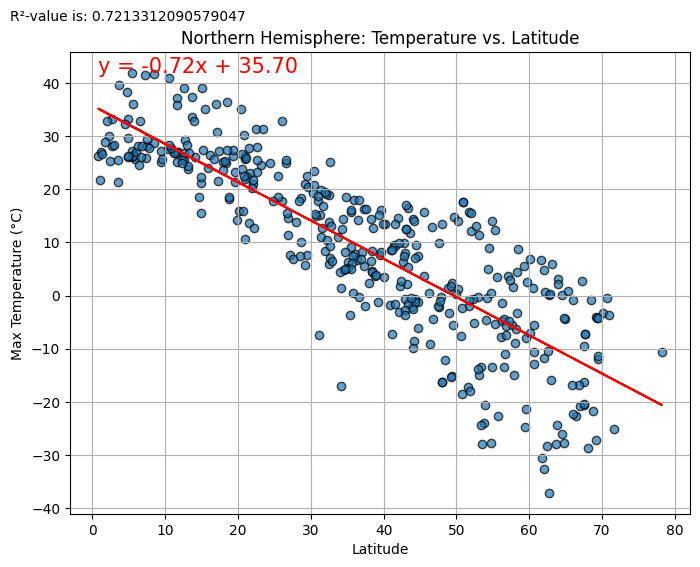

In [81]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi['Lat'], northern_hemi['Max Temp'],
    "Northern Hemisphere: Temperature vs. Latitude",
    "Latitude", "Max Temperature (°C)",
    "output_data/NH_Temp_vs_Lat.png"
)

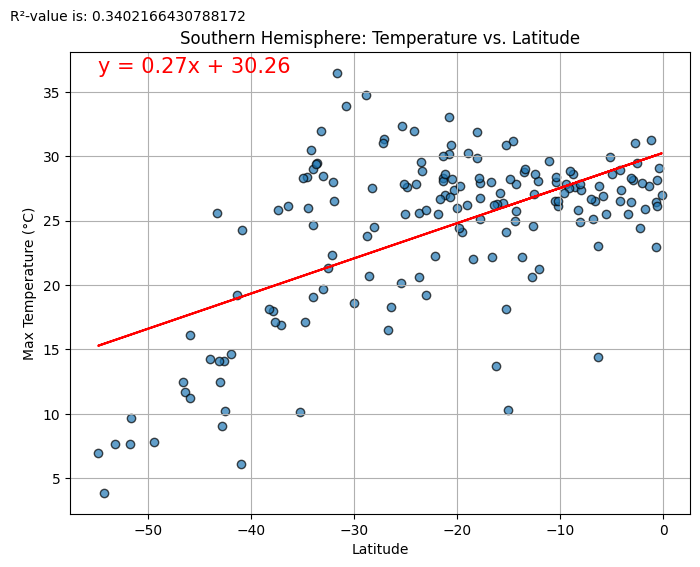

In [82]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi['Lat'], southern_hemi['Max Temp'],
    "Southern Hemisphere: Temperature vs. Latitude",
    "Latitude", "Max Temperature (°C)",
    "output_data/SH_Temp_vs_Lat.png"
)

**Discussion about the linear relationship:** As latitude increases (moving further away from the equator and towards the North Pole or South Pole), temperatures generally decreases.
The slope of the regression line will be negative, indicating that temperature drops as you move further north or south. A high R^2 means latitude explains most of the variability in temperature. A low R^2 means there could be presence of other factors that influences temperature. So basically the closer you are to the equator, the higher the temperature which also means the further you move to the poles, the closer it gets.

### Humidity vs. Latitude Linear Regression Plot

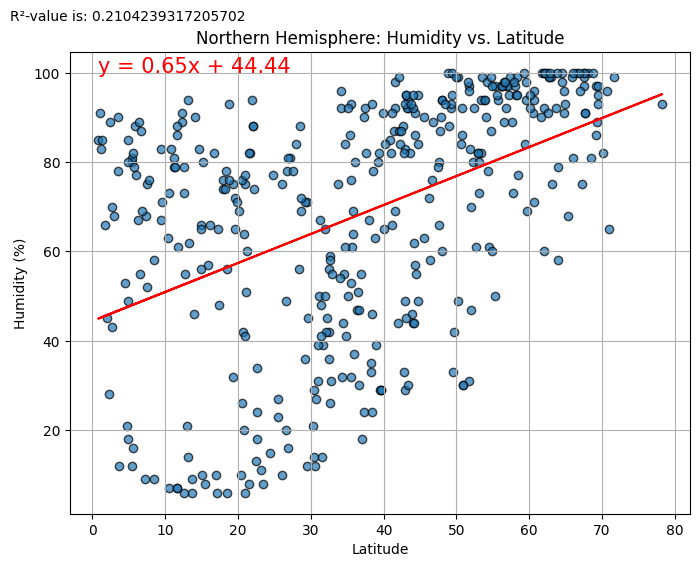

In [83]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi['Lat'], northern_hemi['Humidity'],
    "Northern Hemisphere: Humidity vs. Latitude",
    "Latitude", "Humidity (%)",
    "output_data/NH_Humidity_vs_Lat.png"
)

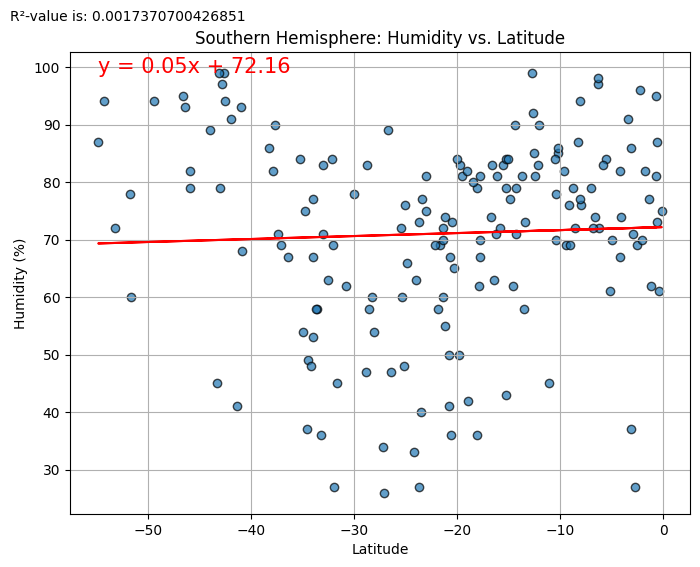

In [84]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi['Lat'], southern_hemi['Humidity'],
    "Southern Hemisphere: Humidity vs. Latitude",
    "Latitude", "Humidity (%)",
    "output_data/SH_Humidity_vs_Lat.png"
)

**Discussion about the linear relationship:** Northern Hemisphere has a relatively weak positive correlation. Slightly higher humidity at higher latitudes.
South Hemisphere has also no correlation at all, the line is nearly flat, indicates no clear relationship but there does appear to be higher humidity data-points closer to equator.

### Cloudiness vs. Latitude Linear Regression Plot

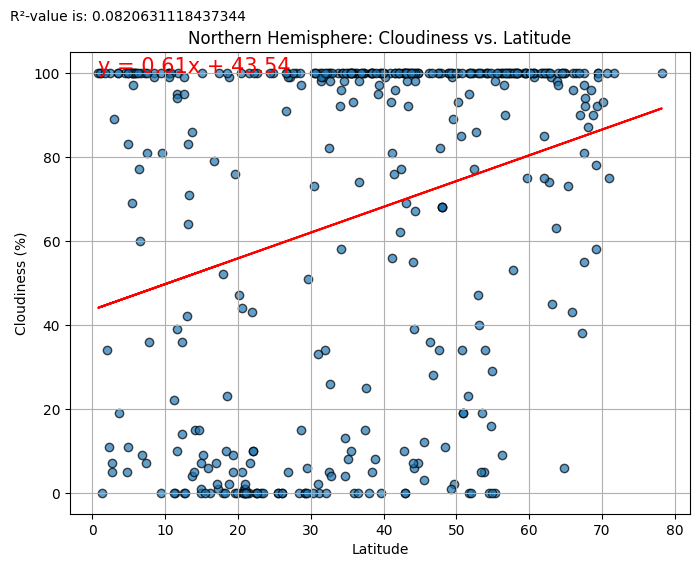

In [85]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi['Lat'], northern_hemi['Cloudiness'],
    "Northern Hemisphere: Cloudiness vs. Latitude",
    "Latitude", "Cloudiness (%)",
    "output_data/NH_Cloudiness_vs_Lat.png"
)

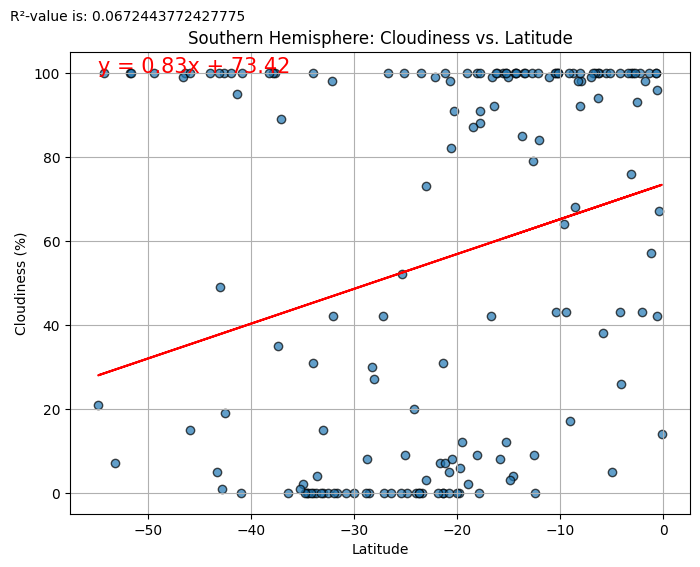

In [86]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi['Lat'], southern_hemi['Cloudiness'],
    "Southern Hemisphere: Cloudiness vs. Latitude",
    "Latitude", "Cloudiness (%)",
    "output_data/SH_Cloudiness_vs_Lat.png"
)

**Discussion about the linear relationship:** Both hemispheres correlations are near-zero values. Therefore cloudiness is not strongly tied to latitude.

### Wind Speed vs. Latitude Linear Regression Plot

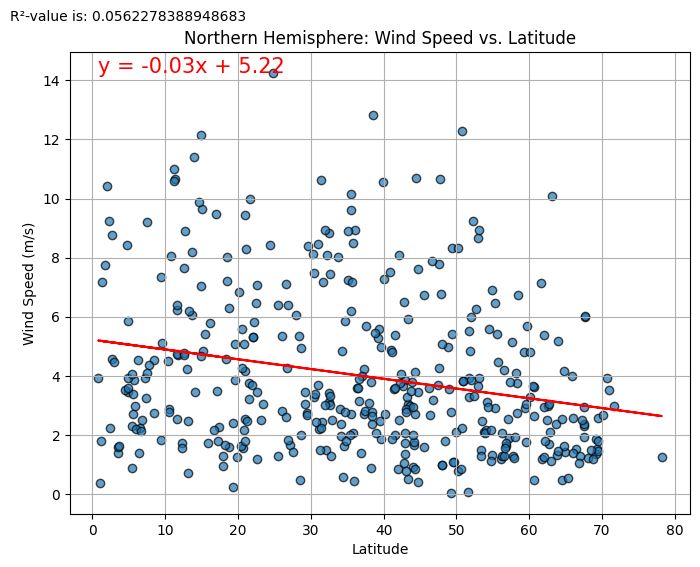

In [87]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi['Lat'], northern_hemi['Wind Speed'],
    "Northern Hemisphere: Wind Speed vs. Latitude",
    "Latitude", "Wind Speed (m/s)",
    "output_data/NH_Wind_vs_Lat.png"
)

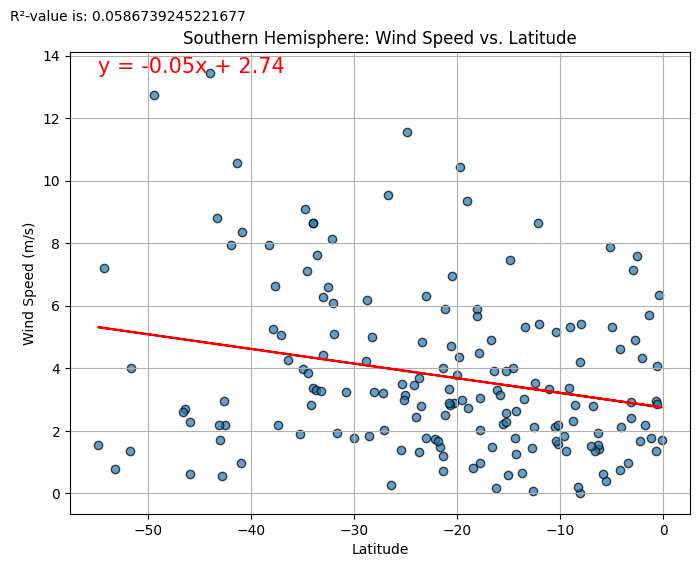

In [88]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi['Lat'], southern_hemi['Wind Speed'],
    "Southern Hemisphere: Wind Speed vs. Latitude",
    "Latitude", "Wind Speed (m/s)",
    "output_data/SH_Wind_vs_Lat.png"
)

**Discussion about the linear relationship:** Both hemispheres have very weak correlation, northern hemisphere has wind speeds that varies widely, southern hemisphere has more low wind speeds closer to equator.